<a href="https://colab.research.google.com/github/Zzero76/Machine-learning/blob/main/8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from scipy.stats import randint as sp_randint
from sklearn.metrics import mean_squared_error, r2_score
import time

# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/Zzero76/Machine-learning/main/123.csv")
df = df.drop(columns=['E', 'F'])
X = df.drop(columns=['AH'])
y = df['AH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Baseline Simple Linear Regression
model_baseline = LinearRegression()
model_baseline.fit(X_train, y_train)
y_pred_baseline = model_baseline.predict(X_test)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

# Step 4: Polynomial Linear Regression (Degree 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Polynomial coefficients
coefficients_poly = model_poly.coef_

# Print results
print(f"Baseline Model - MSE: {mse_baseline:.4f}, R²: {r2_baseline:.4f}")
print(f"Polynomial Model (Degree 2) - MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}")
print("Polynomial Model Coefficients:", coefficients_poly)

Baseline Model - MSE: 53.9104, R²: 0.6150
Polynomial Model (Degree 2) - MSE: 48564276778383884288.0000, R²: -346835632805547392.0000
Polynomial Model Coefficients: [-4.72569515e+07  1.47188889e+08 -1.97597465e+08 -7.64409848e+06
  8.24175434e+06  2.46745775e+06  7.36742852e+05  3.27257563e+06
  1.23195693e+06 -1.41221669e+06 -1.55506523e+07  2.08814422e+07
 -1.51393001e+05  2.67854765e+06  5.54078009e+06 -1.97894937e+06
  2.20377722e+06 -3.21672617e+05 -3.43543516e+05 -2.68870382e+05
  4.10245175e+05  1.51763399e+05  1.94371887e+04 -4.90680374e+04
  2.14997469e+05 -1.96437211e+05 -5.03877271e+03  3.55993997e+07
  1.48309510e+05  1.03845410e+08  8.25453482e+07 -6.91441734e+04
  1.13248825e-06 -2.90135061e-03 -1.49078900e-04  1.03399158e-04
 -1.49638026e+06  9.88286174e+05 -4.23038290e+03 -1.56765245e+03
 -3.80430422e+05  9.87775997e+05 -2.43985795e+06 -8.51403919e+05
 -6.69504544e+04  3.92286202e+05 -2.69193121e+06 -2.70682688e+05
  6.26136258e+04  4.17739944e+05  1.87548708e+05 -4.0125

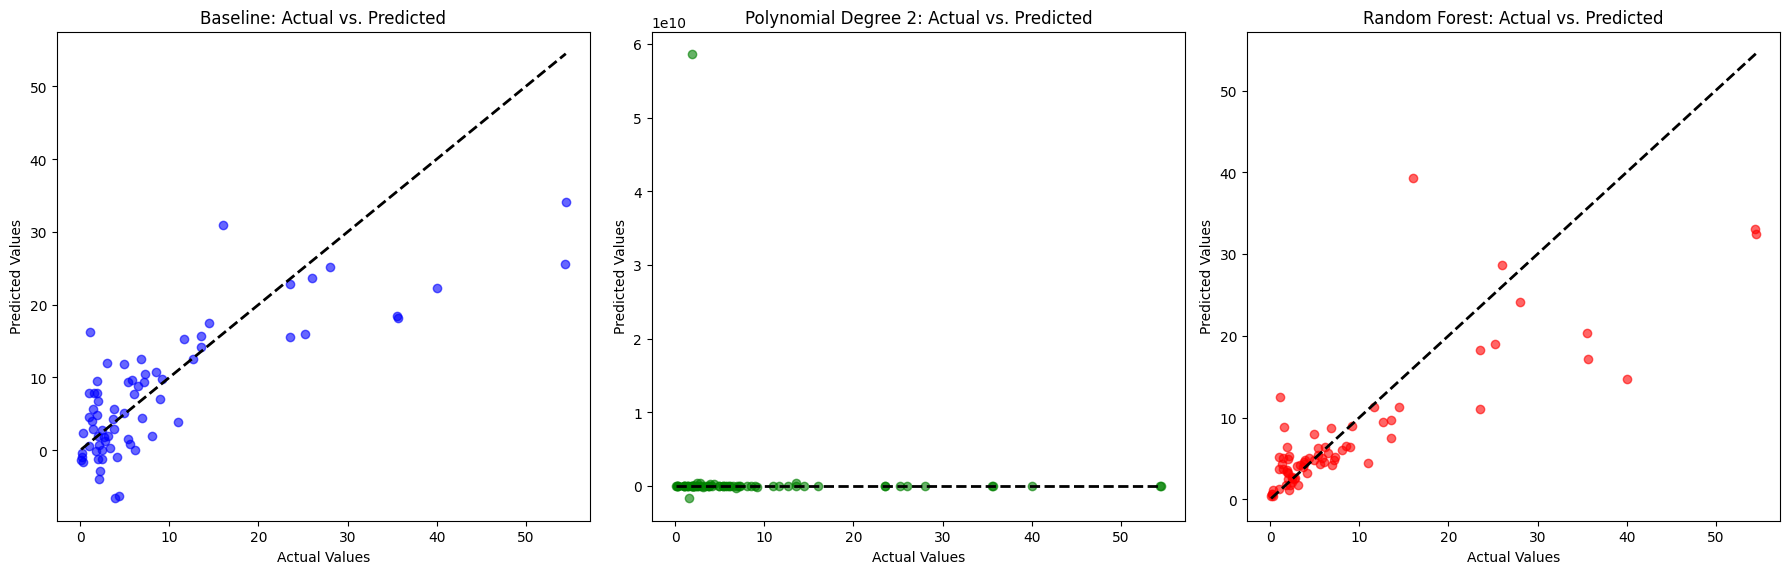

In [6]:
import matplotlib.pyplot as plt

# Assuming model training and prediction for Random Forest is done as follows:
# Random Forest Model training and prediction
# Use the optimized parameters (Example parameters shown, replace with actual ones if different)
rf_params = {
    'n_estimators': 100,
    'max_features': 'sqrt',
    'max_depth': 30,
    'min_samples_split': 2
}
model_rf = RandomForestRegressor(**rf_params, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Now, plotting the comparison of actual vs. predicted values for all three models
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_baseline, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Baseline: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Polynomial Degree 2: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()
